<a href="https://colab.research.google.com/github/Swagaat/AI-Hw/blob/main/Parsing_dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("earthquake.csv")
landslides=pd.read_csv("landslide.csv")
volcanos=pd.read_csv("volcano.csv")
# set seed for reproducibility
np.random.seed(0)

In [ ]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [ ]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [ ]:
landslides['date'].dtype

dtype('O')

In [ ]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [ ]:
landslides['date_parsed'].head()

,date_parsed
0,2007-03-02
1,2007-03-22
2,2007-04-06
3,2007-04-14
4,2007-04-15


In [ ]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

,date_parsed
0,2.0
1,22.0
2,6.0
3,14.0
4,15.0


<ipython-input-13-389bb47f8224>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

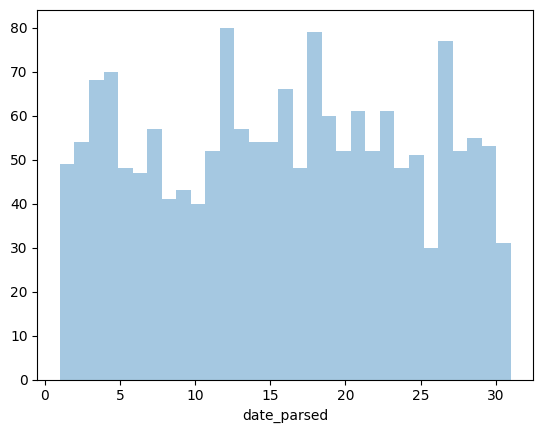

In [ ]:
day_of_month_landslides=day_of_month_landslides.dropna()
sns.distplot(day_of_month_landslides, kde=False, bins=31)

In [ ]:
landslides=landslides.drop(columns=['date_parsed'])

# 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the dtype of the column?

In [ ]:
# TODO: Your code here!
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
earthquakes['Date'].dtype

# 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [ ]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [ ]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

,count
Date,
10,23409
24,3


Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [ ]:
indices = np.where([date_lengths == 24])[1]
#[1] extracts the second array (the column indices)
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [ ]:
# TODO: Your code here
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True, errors='coerce')
earthquakes.head()

<ipython-input-44-f7ac46e119c9>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True, errors='coerce')


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09


# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [ ]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

In [ ]:
# TODO: Your code here!
earthquakes['date_parsed'].head()




,date_parsed
0,1965-01-02
1,1965-01-04
2,1965-01-05
3,1965-01-08
4,1965-01-09


Does the graph make sense to you?

# Challenge

For an extra challenge, you'll work with a [Smithsonian dataset] that documents Earth's volcanoes and their eruptive history over the past 10,000 years

Run the next code cell to load the data.

In [ ]:
volcanos = pd.read_csv("volcano.csv")

Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [ ]:
volcanos['Last Known Eruption'].sample(5)

,Last Known Eruption
764,Unknown
1069,1996 CE
34,1855 CE
489,2016 CE
9,1302 CE


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-58-679cc51e4a0a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=landslides['longitude'], y=landslides['latitude'], cmap="Reds", shade=True, bw_adjust=0.5)


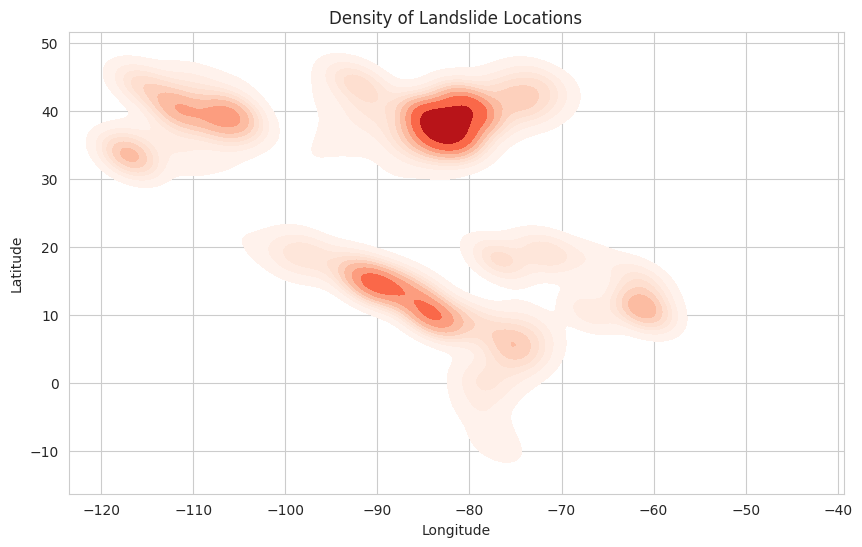

In [ ]:
#Swagat Neupane
'''
SUMMARY: The code creates a KDE plot to visualize landslides
distribution based on geographic coordinates.
It uses a color gradient to represent density,
with darker reds indicating higher densities and
lighter reds indicating fewer occurrences.
The plot smooths density estimates, highlighting hotspots and
identifying patterns. This visualization aids in understanding
underlying causes, planning risk mitigation strategies, and
focusing monitoring efforts.
'''
plt.figure(figsize=(10, 6))
sns.kdeplot(x=landslides['longitude'], y=landslides['latitude'], cmap="Reds", shade=True, bw_adjust=0.5)
plt.title('Density of Landslide Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


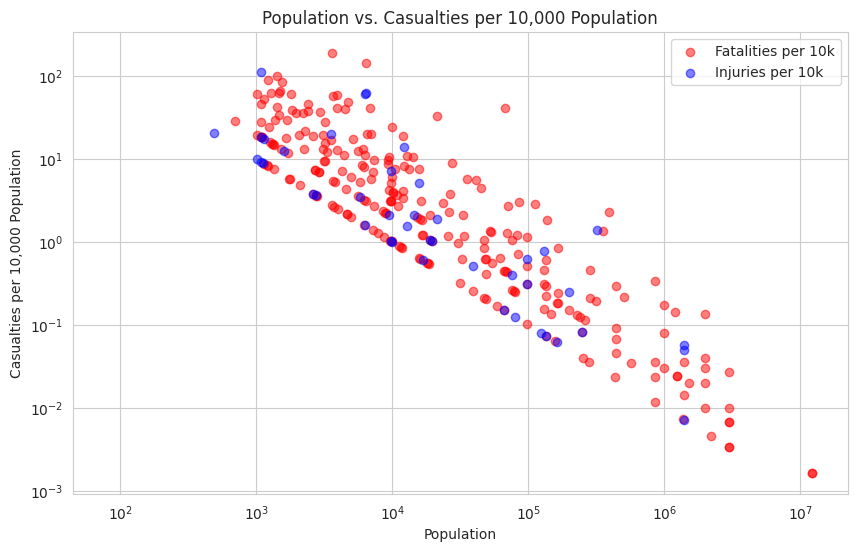

In [ ]:
#Samir Khadka
#Summary:
'''The code calculates the number of fatalities and injuries per
10,000 people for each region affected by landslides, normalizing
the data to make it comparable across different population sizes.
It then creates a scatter plot with logarithmic scales on both axes
to visualize the relationship between population size and casualties.
 The red points represent fatalities per 10,000 people,
 while the blue points represent injuries per 10,000 people.
 Using a log scale helps to handle the wide range of population sizes,
 compressing the data and making it easier to identify trends.
 The plot provides insights into how casualties scale with population
 size and can reveal regions with disproportionately high or low
casualty rates relative to their population size.
'''
# Calculating fatalities and injuries per 10,000 population
landslides['fatalities_per_10k'] = (landslides['fatalities'] / landslides['population']) * 10000
landslides['injuries_per_10k'] = (landslides['injuries'] / landslides['population']) * 10000

# Scatter plot to see the relationship between population and fatalities/injuries
plt.figure(figsize=(10, 6))
plt.scatter(landslides['population'], landslides['fatalities_per_10k'], color='red', alpha=0.5, label='Fatalities per 10k')
plt.scatter(landslides['population'], landslides['injuries_per_10k'], color='blue', alpha=0.5, label='Injuries per 10k')
plt.xscale('log')
plt.yscale('log')
plt.title('Population vs. Casualties per 10,000 Population')
plt.xlabel('Population')
plt.ylabel('Casualties per 10,000 Population')
plt.legend()
plt.show()


In [ ]:
volcanoes

In [ ]:
volcanoes.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,NaT,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,NaT,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,NaT,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,NaT,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,NaT,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


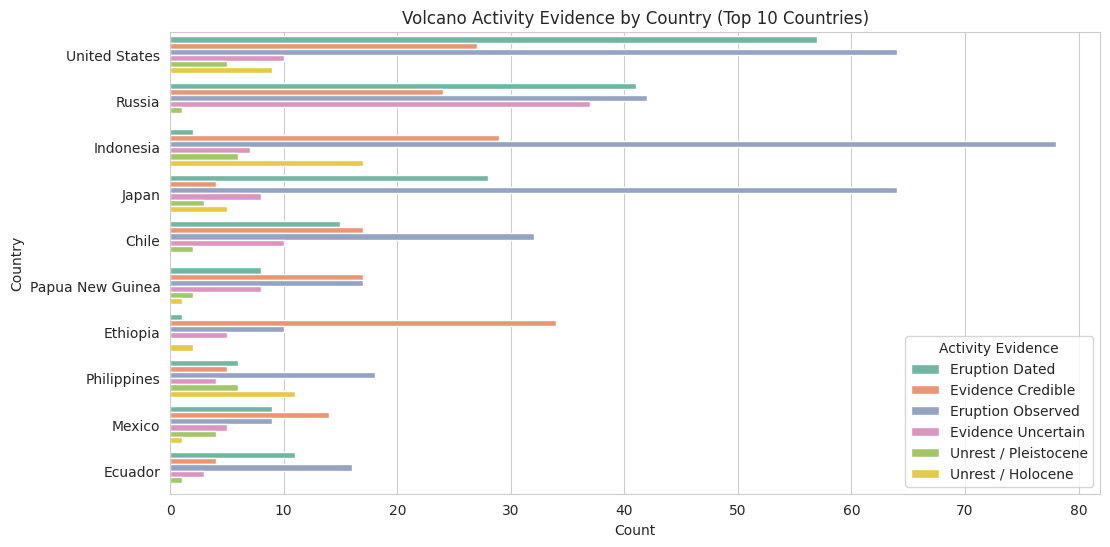

In [ ]:
 #Samir Khadka

'''The code creates a horizontal bar chart that
  visualizes the distribution of volcano activity
  evidence across the top 10 countries with the most volcanoes.
  The y-axis represents the countries, while the x-axis shows the
  count of volcanoes in each country. The bars are color-coded based
  on the type of activity evidence (such as active, dormant, or extinct),
  which is indicated by the legend. The data is ordered by the number of
  volcanoes in each country, focusing on the top 10 countries with the
  highest counts. This visualization allows for a quick comparison of
  volcanic activity across different countries, providing insights into
  which countries have the most volcanoes and how their activity status
  is distributed.

  The output of this code will be a clear and informative bar chart that
  not only displays the number of volcanoes in each of the top 10 countries
  but also shows how these volcanoes are classified based on their activity
  evidence. This helps identify geographical patterns in volcanic activity,
  revealing trends about the distribution of active, dormant, and extinct
  volcanoes across countries. The chart can be particularly useful for
  understanding the global landscape of volcanic risk and activity.
'''
import matplotlib.pyplot as plt
import seaborn as sns
#Frequency of Volcano Activity Evidence by Country
plt.figure(figsize=(12, 6))
sns.countplot(data=volcanoes, y='Country', hue='Activity Evidence',
              order=volcanoes['Country'].value_counts().index[:10])  # Top 10 countries by count
plt.title('Volcano Activity Evidence by Country (Top 10 Countries)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Activity Evidence')
plt.show()


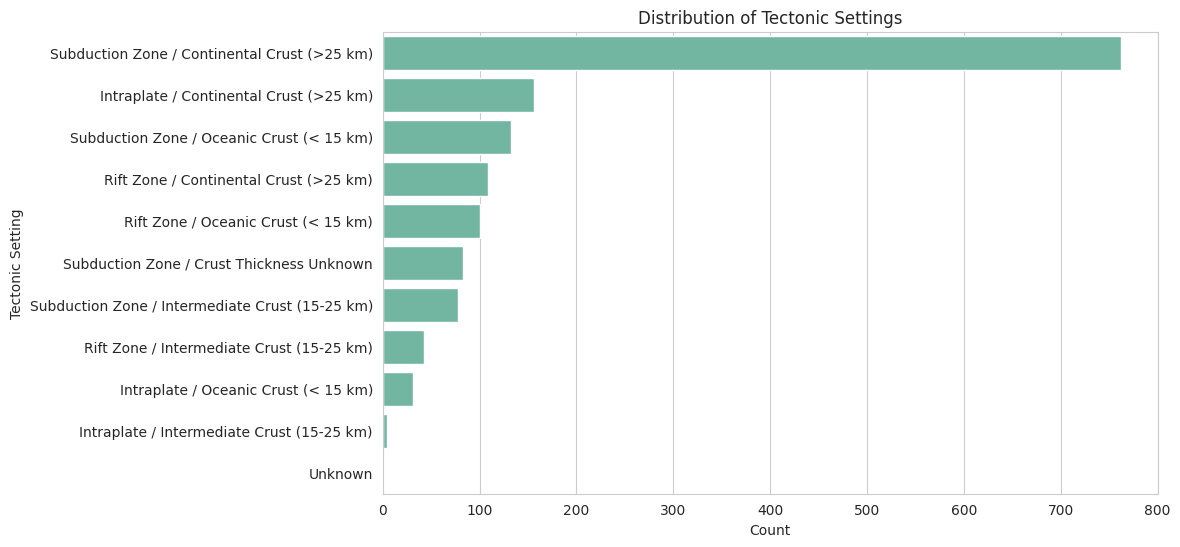

In [ ]:
# Swagat Neupane:
'''Summary: The code generates a vertical bar chart
that visualizes the distribution of volcanoes across
different tectonic settings. The y-axis represents
the various tectonic settings, such as divergent,
convergent, and transform boundaries, while the x-axis
shows the count of volcanoes found in each setting.
The bars are arranged in descending order based on the
frequency of each tectonic setting, making it easy to
identify which settings are most commonly associated with volcanoes.
The chart allows for a clear comparison of the tectonic environments
where volcanoes are located, providing insights into the relationship
between tectonic plate movements and volcanic activity.
This visualization highlights the prevalence of certain tectonic
 settings and helps better understand how geological processes
 influence volcanic distribution.
 '''
#Distribution of Tectonic Settings
plt.figure(figsize=(10, 6))
sns.countplot(data=volcanoes, y='Tectonic Setting', order=volcanoes['Tectonic Setting'].value_counts().index)
plt.title('Distribution of Tectonic Settings')
plt.xlabel('Count')
plt.ylabel('Tectonic Setting')
plt.show()
